In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils 
from keras.layers import Input, Concatenate
from keras.models import Model

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


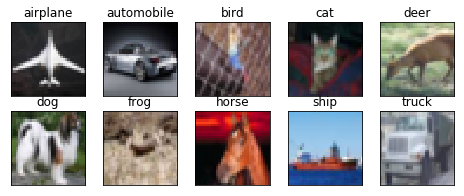

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

**Model as per the requirement**

In [7]:
# Define the model

img_input = Input(shape=(32, 32, 3))

# Simple Convolution Layer
conv1 = Convolution2D(48, 3, 3, input_shape=(32, 32, 3))(img_input)
conv1 = Activation('relu')(conv1)
conv1 = BatchNormalization()(conv1)
conv1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Spatially Seprable Convolution
conv1 = Convolution2D(48, 3, 1)(conv1)
conv1 = Convolution2D(48, 1, 3)(conv1)
conv1 = Activation('relu')(conv1)
conv1 = BatchNormalization()(conv1)
conv1 = Dropout(0.25)(conv1)

#Depthwise Seprable Convolution
conv1 = DepthwiseConv2D(3, depth_multiplier = 2)(conv1)
conv1 = Activation('relu')(conv1)
conv1 = BatchNormalization()(conv1)
conv1 = Dropout(0.25)(conv1)

# First grouped convolution - Grouped Convolution (use 3x3, 5x5 only)
left = Convolution2D(192, (3, 3), padding = 'same')(conv1)
right = Convolution2D(192, (5, 5), padding = 'same')(conv1)
conv2 = Concatenate(axis=3)([left, right])
conv2 = Activation('relu')(conv2)
conv2 = BatchNormalization()(conv2)
conv2 = Dropout(0.25)(conv2)
conv2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# Second grouped convolution -
# Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
left = Convolution2D(192, (3, 3), padding = 'same', dilation_rate = 1)(conv2)
right = Convolution2D(192, (3, 3), padding = 'same', dilation_rate = 2)(conv2)
conv3 = Concatenate(axis=3)([left, right])
conv3 = Activation('relu')(conv3)
conv3 = BatchNormalization()(conv3)
conv3 = Dropout(0.25)(conv3)

conv3 = Convolution2D(num_classes, 1)(conv3)
conv3 = Convolution2D(num_classes, 5)(conv3)
conv3 = BatchNormalization()(conv3)
conv3 = Flatten()(conv3)
conv3 = Activation('softmax')(conv3)


model = Model(img_input, conv3, name='model-1')


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3...)`
  """








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 1))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 3))`
  if sys.path[0] == '':


In [8]:
model.summary()

Model: "model-1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 30, 30, 48)   1344        input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 30, 30, 48)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 30, 30, 48)   192         activation_1[0][0]               
____________________________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':




Epoch 1/50
390/390 [==============================] - 43s 110ms/step - loss: 1.3671 - acc: 0.5407 - val_loss: 1.4336 - val_acc: 0.5093
Epoch 2/50
390/390 [==============================] - 37s 94ms/step - loss: 0.9880 - acc: 0.6836 - val_loss: 1.0294 - val_acc: 0.6492
Epoch 3/50
390/390 [==============================] - 36s 93ms/step - loss: 0.8074 - acc: 0.7417 - val_loss: 1.0436 - val_acc: 0.6716
Epoch 4/50
390/390 [==============================] - 36s 93ms/step - loss: 0.6834 - acc: 0.7822 - val_loss: 0.9296 - val_acc: 0.7160
Epoch 5/50
390/390 [==============================] - 36s 93ms/step - loss: 0.5916 - acc: 0.8122 - val_loss: 0.8081 - val_acc: 0.7574
Epoch 6/50
390/390 [==============================] - 36s 93ms/step - loss: 0.5099 - acc: 0.8367 - val_loss: 1.8110 - val_acc: 0.6318
Epoch 7/50
390/390 [==============================] - 36s 93ms/step - loss: 0.4413 - acc: 0.8593 - val_loss: 1.1317 - val_acc: 0.7072
Epoch 8/50
390/390 [==============================] - 36s 9

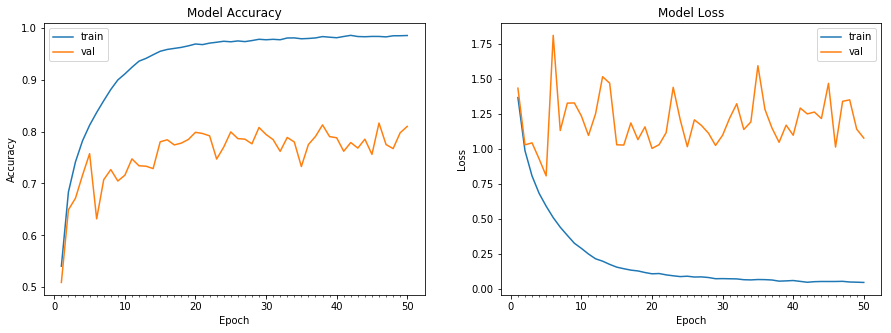

Accuracy on test data is: 80.99


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy of the model on the test data is Approx 84%. This higher than the baseline accuracy of 82%.

Observations: -

1. Training accuracy of the new model is more than 99% but validation accuracy could not reach even 85%. This is a case of overfitting

2. Some conv layers do not have drop outs and adding those may help in improving the accuracy for val and test datasets

3. Image Normalization may help and can be tried

4. Regularization in the loss function may also help.